In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta
import numpy as np

pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
colors = sns.color_palette('pastel')

In [2]:
df = pd.read_csv('model.csv')

In [3]:
df.head(5)

,Unnamed: 0,customer_id,new_session_id,target,total_amount,shipment_fee,ADD_TO_CART_COUNT,SEARCH_COUNT,ADD_PROMO_COUNT,BOOKING_COUNT,ITEM_DETAIL_COUNT,limit_ship,PAGE_VIEW,total_promo,total_session
0,0,3.0,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,1,4,0,2.0,0.0,1.0,1.0,0.0,1,8,3,3
1,1,3.0,36673b2f-940a-42b5-994d-1cce4796b55f_1792149,0,0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,3
2,2,3.0,36673b2f-940a-42b5-994d-1cce4796b55f_1792150,0,0,0,2.0,0.0,0.0,0.0,0.0,0,2,0,3
3,3,3.0,36673b2f-940a-42b5-994d-1cce4796b55f_1792151,0,0,0,1.0,0.0,0.0,0.0,0.0,0,1,0,3
4,4,3.0,36673b2f-940a-42b5-994d-1cce4796b55f_1792152,1,1,2,0.0,0.0,0.0,1.0,0.0,3,1,0,3


In [4]:
df['total_session'] = df.groupby('customer_id')['new_session_id'].transform('count')

In [5]:
df.head(5)

,Unnamed: 0,customer_id,new_session_id,target,total_amount,shipment_fee,ADD_TO_CART_COUNT,SEARCH_COUNT,ADD_PROMO_COUNT,BOOKING_COUNT,ITEM_DETAIL_COUNT,limit_ship,PAGE_VIEW,total_promo,total_session
0,0,3.0,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,1,4,0,2.0,0.0,1.0,1.0,0.0,1,8,3,321
1,1,3.0,36673b2f-940a-42b5-994d-1cce4796b55f_1792149,0,0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,321
2,2,3.0,36673b2f-940a-42b5-994d-1cce4796b55f_1792150,0,0,0,2.0,0.0,0.0,0.0,0.0,0,2,0,321
3,3,3.0,36673b2f-940a-42b5-994d-1cce4796b55f_1792151,0,0,0,1.0,0.0,0.0,0.0,0.0,0,1,0,321
4,4,3.0,36673b2f-940a-42b5-994d-1cce4796b55f_1792152,1,1,2,0.0,0.0,0.0,1.0,0.0,3,1,0,321


In [6]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'new_session_id', 'target', 'total_amount',
       'shipment_fee', 'ADD_TO_CART_COUNT', 'SEARCH_COUNT', 'ADD_PROMO_COUNT',
       'BOOKING_COUNT', 'ITEM_DETAIL_COUNT', 'limit_ship', 'PAGE_VIEW',
       'total_promo', 'total_session'],
      dtype='object')

In [8]:
X = df[['total_amount','shipment_fee', 'ADD_TO_CART_COUNT', 'SEARCH_COUNT', 'ADD_PROMO_COUNT',
       'BOOKING_COUNT', 'ITEM_DETAIL_COUNT', 'limit_ship', 'PAGE_VIEW',
       'total_promo', 'total_session']]
y = df['target']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
print("data training: ", X_train.shape)
print("data testing: ", X_test.shape)

data training:  (3041769, 11)
data testing:  (1303616, 11)


In [24]:
y_train.shape

(3041769,)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(n_estimators=250,max_depth=12,min_samples_leaf=16),
    "XGBoost" : XGBClassifier(max_depth=12,
                              n_estimators=250,
                              min_child_weight=8, 
                              subsample=0.8, 
                              learning_rate =0.02,    
                              seed=42)
}

In [15]:
result_table = pd.DataFrame(columns=['classifiers','accuracy','presicion','recall','f1_score','fpr','tpr','auc'])

In [59]:
# 로지스틱 회귀 모델 생성
model = LogisticRegression()

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# 각 클래스에 속할 확률 출력
print("Class probabilities:\n{}".format(y_pred_proba))

c:\Users\mj985\anaconda3\envs\assign\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 85.51%
Class probabilities:
[[0.89065837 0.10934163]
 [0.17320445 0.82679555]
 [0.76901285 0.23098715]
 ...
 [0.79531974 0.20468026]
 [0.93022534 0.06977466]
 [0.85909013 0.14090987]]


In [64]:
y_test

2685437    0
3856564    1
3144437    0
3059282    0
948815     0
          ..
2058718    0
312003     0
3082701    0
3858954    0
3639091    0
Name: target, Length: 1303616, dtype: int64

In [62]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
y_pred_series = pd.Series(y_pred, index=y_test.index)

In [65]:
y_test_array = y_test.values

In [67]:
y_test_array

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
y_pred_series

2685437    0
3856564    1
3144437    0
3059282    0
948815     0
          ..
2058718    0
312003     0
3082701    0
3858954    0
3639091    0
Length: 1303616, dtype: int64

In [75]:
# confusion matrix 출력
print("Confusion Matrix:\n{}".format(confusion_matrix(y_test, y_pred_series)))

# precision, recall, f1-score 출력
print("Precision Score: {:.2f}%".format(precision_score(y_test, y_pred_series, average="weighted") * 100))
print("Recall Score: {:.2f}%".format(recall_score(y_test, y_pred_series, average="weighted") * 100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred_series, average="weighted") * 100))

TypeError: 'numpy.ndarray' object is not callable

In [77]:
# confusion matrix 출력
confusion_matrix = confusion_matrix(y_test, y_pred_series)
print("Confusion Matrix:\n{}".format(confusion_matrix))

# confusion matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")

TypeError: 'numpy.ndarray' object is not callable

In [55]:
y.value_counts(normalize=True)

target
0    0.777027
1    0.222973
Name: proportion, dtype: float64

In [30]:
model = XGBClassifier(max_depth=12, n_estimators=250,min_child_weight=8,subsample=0.8, learning_rate =0.02, seed=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# 각 클래스에 속할 확률 출력
print("Class probabilities:\n{}".format(y_pred_proba))




Accuracy: 86.34%
Class probabilities:
[[0.91629195 0.08370807]
 [0.02611965 0.97388035]
 [0.478011   0.521989  ]
 ...
 [0.83330333 0.16669664]
 [0.9148429  0.08515711]
 [0.95534843 0.04465159]]


In [31]:
# confusion matrix 출력
print("Confusion Matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

# precision, recall, f1-score 출력
print("Precision Score: {:.2f}%".format(precision_score(y_test, y_pred, average="weighted") * 100))
print("Recall Score: {:.2f}%".format(recall_score(y_test, y_pred, average="weighted") * 100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred, average="weighted") * 100))

Confusion Matrix:
[[977473  34935]
 [143093 148115]]
Precision Score: 85.82%
Recall Score: 86.34%
F1 Score: 85.13%


In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

Confusion Matrix:
[[977473  34935]
 [143093 148115]]


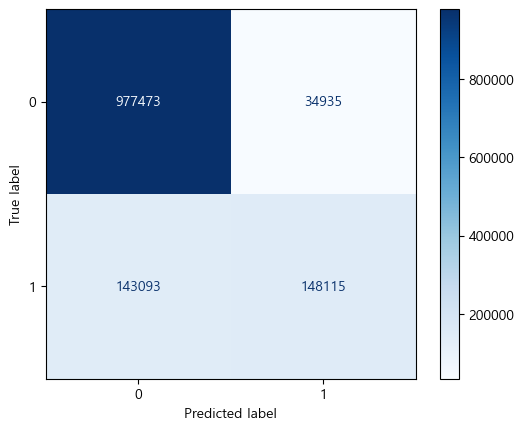

In [34]:
# confusion matrix 출력
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n{}".format(confusion_matrix))

# confusion matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")

In [74]:
import tensorflow as tf
from tensorflow.keras import layers

In [37]:
# 모델 구성
deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 학습
deep_model.fit(X_train, y_train, epochs=10)

# 모델 평가
test_loss, test_acc = deep_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# 예측값 계산
y_pred = deep_model.predict(X_test)

# 지표 계산
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Accuracy:', acc)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)

Epoch 1/10
95056/95056 [==============================] - 131s 1ms/step - loss: 0.3865 - accuracy: 0.8594
Epoch 2/10
95056/95056 [==============================] - 126s 1ms/step - loss: 0.3773 - accuracy: 0.8612
Epoch 3/10
95056/95056 [==============================] - 124s 1ms/step - loss: 0.3763 - accuracy: 0.8617
Epoch 4/10
95056/95056 [==============================] - 125s 1ms/step - loss: 0.3757 - accuracy: 0.8619
Epoch 5/10
95056/95056 [==============================] - 119s 1ms/step - loss: 0.3753 - accuracy: 0.8619
Epoch 6/10
95056/95056 [==============================] - 119s 1ms/step - loss: 0.3753 - accuracy: 0.8619
Epoch 7/10
95056/95056 [==============================] - 120s 1ms/step - loss: 0.3749 - accuracy: 0.8619
Epoch 8/10
95056/95056 [==============================] - 119s 1ms/step - loss: 0.3748 - accuracy: 0.8620
Epoch 9/10
95056/95056 [==============================] - 119s 1ms/step - loss: 0.3747 - accuracy: 0.8620
Epoch 10/10
40738/40738 [=====================

In [38]:
# 모델 구성
deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 학습
deep_model.fit(X_train, y_train, epochs=10, batch_size = 128)

# 모델 평가
test_loss, test_acc = deep_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# 예측값 계산
y_pred = deep_model.predict(X_test)

# 지표 계산
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Accuracy:', acc)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)

Epoch 1/10
23764/23764 [==============================] - 35s 1ms/step - loss: 0.3983 - accuracy: 0.8572
Epoch 2/10
23764/23764 [==============================] - 30s 1ms/step - loss: 0.3787 - accuracy: 0.8609
Epoch 3/10
23764/23764 [==============================] - 29s 1ms/step - loss: 0.3760 - accuracy: 0.8619
Epoch 4/10
23764/23764 [==============================] - 36s 2ms/step - loss: 0.3750 - accuracy: 0.8620
Epoch 5/10
23764/23764 [==============================] - 37s 2ms/step - loss: 0.3744 - accuracy: 0.8622
Epoch 6/10
23764/23764 [==============================] - 35s 1ms/step - loss: 0.3740 - accuracy: 0.8623
Epoch 7/10
23764/23764 [==============================] - 37s 2ms/step - loss: 0.3738 - accuracy: 0.8623
Epoch 8/10
23764/23764 [==============================] - 35s 1ms/step - loss: 0.3735 - accuracy: 0.8623
Epoch 9/10
23764/23764 [==============================] - 36s 2ms/step - loss: 0.3734 - accuracy: 0.8623
Epoch 10/10
40738/40738 [==============================

In [39]:
# 모델 구성
deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 학습
deep_model.fit(X_train, y_train, epochs=10, batch_size = 256)

# 모델 평가
test_loss, test_acc = deep_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# 예측값 계산
y_pred = deep_model.predict(X_test)

# 지표 계산
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Accuracy:', acc)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)

Epoch 1/10
11882/11882 [==============================] - 20s 2ms/step - loss: 0.4098 - accuracy: 0.8554
Epoch 2/10
11882/11882 [==============================] - 19s 2ms/step - loss: 0.3873 - accuracy: 0.8596
Epoch 3/10
11882/11882 [==============================] - 20s 2ms/step - loss: 0.3799 - accuracy: 0.8609
Epoch 4/10
11882/11882 [==============================] - 21s 2ms/step - loss: 0.3767 - accuracy: 0.8615
Epoch 5/10
11882/11882 [==============================] - 20s 2ms/step - loss: 0.3754 - accuracy: 0.8617
Epoch 6/10
11882/11882 [==============================] - 19s 2ms/step - loss: 0.3748 - accuracy: 0.8619
Epoch 7/10
11882/11882 [==============================] - 20s 2ms/step - loss: 0.3744 - accuracy: 0.8620
Epoch 8/10
11882/11882 [==============================] - 19s 2ms/step - loss: 0.3741 - accuracy: 0.8621
Epoch 9/10
11882/11882 [==============================] - 19s 2ms/step - loss: 0.3738 - accuracy: 0.8622
Epoch 10/10
40738/40738 [==============================

In [40]:
import numpy as np

# 클래스별 샘플 수 계산
n_positive = np.sum(y_train == 1)
n_negative = np.sum(y_train == 0)

# 클래스별 가중치 계산
weight_for_0 = 1 / n_negative
weight_for_1 = 1 / n_positive

# 클래스별 가중치를 딕셔너리로 저장
class_weight = {0: weight_for_0, 1: weight_for_1}

print(class_weight)

{0: 4.229989611145515e-07, 1: 1.4755856968527232e-06}


In [41]:
# 모델 학습
deep_model.fit(X_train, y_train, epochs=10, batch_size=64, class_weight=class_weight)

Epoch 1/10
47528/47528 [==============================] - 72s 2ms/step - loss: 3.5178e-07 - accuracy: 0.8387
Epoch 2/10
47528/47528 [==============================] - 68s 1ms/step - loss: 3.2697e-07 - accuracy: 0.8252
Epoch 3/10
47528/47528 [==============================] - 68s 1ms/step - loss: 3.2689e-07 - accuracy: 0.8254
Epoch 4/10
47528/47528 [==============================] - 68s 1ms/step - loss: 3.2685e-07 - accuracy: 0.8252
Epoch 5/10
47528/47528 [==============================] - 70s 1ms/step - loss: 3.2678e-07 - accuracy: 0.8252
Epoch 6/10
47528/47528 [==============================] - 69s 1ms/step - loss: 3.2674e-07 - accuracy: 0.8252
Epoch 7/10
47528/47528 [==============================] - 69s 1ms/step - loss: 3.2675e-07 - accuracy: 0.8251
Epoch 8/10
47528/47528 [==============================] - 71s 1ms/step - loss: 3.2672e-07 - accuracy: 0.8251
Epoch 9/10
47528/47528 [==============================] - 69s 1ms/step - loss: 3.2673e-07 - accuracy: 0.8248
Epoch 10/10
47528/4

In [42]:
# 예측값 계산
y_pred = deep_model.predict(X_test)

# 지표 계산
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Accuracy:', acc)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)

40738/40738 [==============================] - 39s 944us/step
Accuracy: 0.826833975649271
F1 score: 0.6246791162895867
Recall: 0.6451093376555589
Precision: 0.6055031973595998


In [46]:
y_pred = y_pred.flatten()

In [50]:
y_pred.shape

(1303616,)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 데이터를 train, validation, test로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# 각 모델의 하이퍼 파라미터 후보를 정의
lr_param_grid = {'C': [0.01, 0.1, 1, 10]}
knn_param_grid = {'n_neighbors': [3, 5, 7]}
dt_param_grid = {'max_depth': [3, 5, 7]}
rf_param_grid = {'n_estimators': [100, 300], 'max_depth': [3, 5, 7]}
xgb_param_grid = {'n_estimators': [100, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1]}
cat_param_grid = {'iterations': [100, 300], 'depth': [3, 5, 7], 'learning_rate': [0.01, 0.1]}

# 각 모델에 대해 그리드 서치 수행
lr_gs = GridSearchCV(LogisticRegression(), lr_param_grid)
lr_gs.fit(X_train, y_train)

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_param_grid)
knn_gs.fit(X_train, y_train)

dt_gs = GridSearchCV(DecisionTreeClassifier(), dt_param_grid)
dt_gs.fit(X_train, y_train)

rf_gs = GridSearchCV(RandomForestClassifier(), rf_param_grid)
rf_gs.fit(X_train, y_train)

xgb_gs = GridSearchCV(XGBClassifier(), xgb_param_grid)
xgb_gs.fit(X_train, y_train)

cat_gs = GridSearchCV(CatBoostClassifier(verbose=0), cat_param_grid)
cat_gs.fit(X_train, y_train)

# 각 모델에서 최적의 하이퍼 파라미터와 예측 결과를 저장
lr_best_params = lr_gs.best_params_
lr_pred = lr_gs.predict(X_val)

knn_best_params = knn_gs.best_params_
knn_pred = knn_gs.predict(X_val)

dt_best_params = dt_gs.best_params_
dt_pred = dt_gs.predict(X_val)

rf_best_params = rf_gs.best_params_
rf_pred = rf_gs.predict(X_val)

xgb_best_params = xgb_gs.best_params_
xgb_pred = xgb_gs.predict(X_val)

cat_best_params = cat_gs.best_params_
cat_pred = cat_gs.predict(X_val)

# 각 모델의 성능 평가 지표 계산
lr_acc = accuracy_score(y_val, lr_pred)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1_score = f1_score(y_val, lr_pred)

knn_acc = accuracy_score(y_val, knn_pred)
knn_precision = precision_score(y_val, knn_pred)
knn_recall = recall_score(y_val, knn_pred)
knn_f1_score = f1_score(y_val, knn_pred)

dt_acc = accuracy_score(y_val, dt_pred)
dt_precision = precision_score(y_val, dt_pred)
dt_recall = recall_score(y_val, dt_pred)
dt_f1_score = f1_score(y_val, dt_pred)

rf_acc = accuracy_score(y_val, rf_pred)
rf_precision = precision_score(y_val, rf_pred)
rf_recall = recall_score(y_val, rf_pred)
rf_f1_score = f1_score(y_val, rf_pred)

xgb_acc = accuracy_score(y_val, xgb_pred)
xgb_precision = precision_score(y_val, xgb_pred)
xgb_recall = recall_score(y_val, xgb_pred)
xgb_f1_score = f1_score(y_val, xgb_pred)

cat_acc = accuracy_score(y_val, cat_pred)
cat_precision = precision_score(y_val, cat_pred)
cat_recall = recall_score(y_val, cat_pred)
cat_f1_score = f1_score(y_val, cat_pred)

c:\Users\mj985\anaconda3\envs\assign\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mj985\anaconda3\envs\assign\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [ ]:
# 결과 출력
print("Logistic Regression:")
print("Accuracy:", lr_acc)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1_score)

print("K-Nearest Neighbors:")
print("Accuracy:", knn_acc)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1_score)

print("Decision Tree:")
print("Accuracy:", dt_acc)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1_score)

print("Random Forest:")
print("Accuracy:", rf_acc)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)

print("XGBoost:")
print("Accuracy:", xgb_acc)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1_score)

print("CatBoost:")
print("Accuracy:", cat_acc)
print("Precision:", cat_precision)
print("Recall:", cat_recall)
print("F1 Score:", cat_f1_score)